# MNSIT dataset with Autoencoder. 

The final code snippet shows how the Autoencoder (along with encoder and decoder) helps in reducing the noise from the sample output.

In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

Using TensorFlow backend.
/home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28,28)
        return data

## Download the data set from https://github.com/golbin/TensorFlow-MNIST/tree/master/mnist/data

In [3]:
train_data = extract_data('train-images-idx3-ubyte.gz', 60000)
test_data = extract_data('t10k-images-idx3-ubyte.gz', 10000)

In [4]:
import numpy as np
# Import the numpy library
import matplotlib.pyplot as plt
# Import the matplotlib library for plotting
from keras.datasets import mnist
# from the Keras library MNIST data set is used in the example
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# import various libraries from Keras
from keras.models import Model
from keras import backend as K
#Load the required MNSIT Dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
#Scale-up of the Dataset values to lie between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Reshapre the numpy arrays to meet the 28 X 28 Matrix
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
# Add Noise factor(can be varied in the range of 0.2 to 0.5) on the previously downloaded MNIST dataset.
# By using np.random.normal() sampling random values from Gaussian distribution can be done and finally 
# adding it to our original images to change pixel values
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

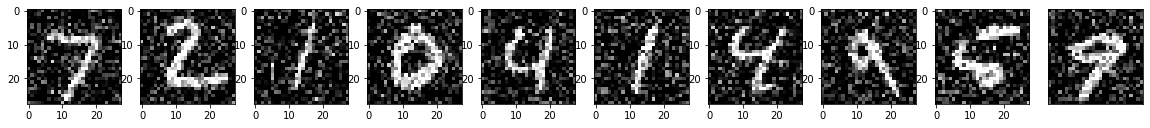

In [7]:
#Visualising the Noisy Digits using Matplotlib
n = 10
#This number can be changed to visualise more digits if required
# Plotting all the digits along with the noise for consideration
plt.figure(figsize=(20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
# Start building the input layer
# Now Specify the Input Layer size which in our case is 28x28x1
input_img = Input(shape=(28, 28, 1))

W0904 14:38:09.465522 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 14:38:10.304757 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [9]:
# Model Construction with Conv2D keras library along with padding done.
# Relu activation function is used through out in all the layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# add max poling layer
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# At this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
# following are the decoder and encoder constructs with sigmoid activation and adam optimizers
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

W0904 14:38:12.424250 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 14:38:12.945051 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0904 14:38:13.089746 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0904 14:38:13.200009 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/optimizer

In [10]:
# With around 25-100 epochs, and with batch_size of 128 train the model with suffling enabled.
autoencoder.fit(x_train_noisy, x_train,
epochs=25,
batch_size=128,
shuffle=True,
validation_data=(x_test_noisy, x_test),
)

W0904 14:38:25.222495 140079318816576 deprecation_wrapper.py:119] From /home/chandru4ni/python-environments/qc/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1341 - val_loss: 0.0922
Epoch 2/25
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0898 - val_loss: 0.0863
Epoch 3/25
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0858 - val_loss: 0.0838
Epoch 4/25
60000/60000 [==============================] - 4260s 71ms/step - loss: 0.0838 - val_loss: 0.0824
Epoch 5/25
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0824 - val_loss: 0.0812
Epoch 6/25
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0814 - val_loss: 0.0803
Epoch 7/25
60000/60000 [==============================] - 150s 3ms/step - loss: 0.0806 - val_loss: 0.0801
Epoch 8/25
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0801 - val_loss: 0.0792
Epoch 9/25
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0796 - val_loss: 0

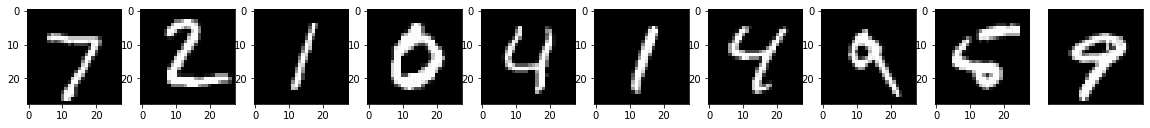

In [11]:
#Visualising the Digits using Matplotlib after it is trained and the noise is removed.
n = 10
# change this number to visualise more digits.
plt.figure(figsize=(20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2019-CS109B/master/content/styles/cs109.css").text
HTML(styles)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

%matplotlib inline

In [14]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

#print(tf.VERSION)
print(tf.keras.__version__)

2.2.4-tf


In [15]:
#mnist = tf.keras.datasets.mnist
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

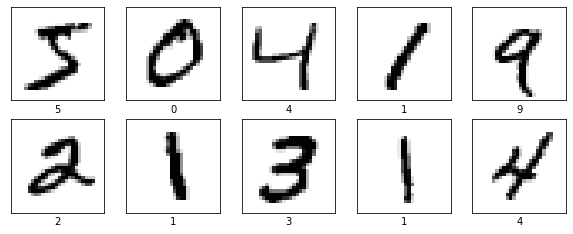

In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])